<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
     <img style="float: right; padding-right: 10px" width="100" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> </div>
     </div>

**Clemson University**<br>
**Instructor(s):** Aaron Masino <br>

## Lab 3: Introduction to Pandas and Data Visualization

In [ ]:
# import the necessary libraries
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns

In [ ]:
# mount the google drive - this is necessary to access supporting resources
from google.colab import drive
drive.mount("/content/drive")

# Learning Goals

By the end of this lab, you should be able to:
- understand the Python Pandas [DataFrame]() structure
- identify and remove `NaN` or `None` objects from a DataFrame
- select elements from a DataFrame based on column values
- transform values in a DataFrame column using the `map` function
- group columns in a DataFrame
- create scatter plots, boxplots, histograms using Python matplotlib OR Python seaborn

# Part 1: Python Pandas


The Python [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) library supports manipulation of tabular data for analysis. There are two important data structures used throughout the Pandas library:
- [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) - represents a table of data
- [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) - represents a vector of data, DataTable columns are Series

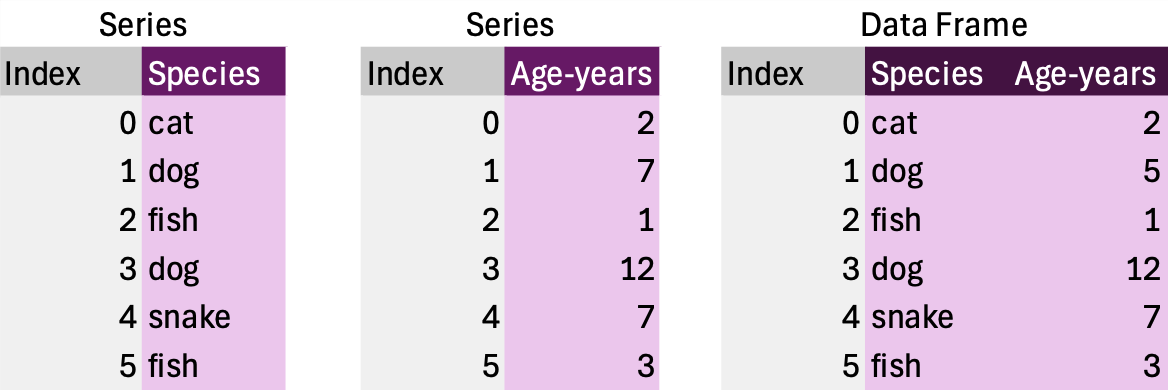

## Loading Data with Pandas


Pandas supports reading data from and writing data to multiple file types. We will focus on __.csv__ files. However, you may explore Pandas other file i/o methods [here](https://pandas.pydata.org/docs/user_guide/io.html).

Let's start by loading data from the _goodreads.csv_ file. We will need to tell Pandas where the file is located. Let's assume you have named your course directory `cpsc4300-6300` and that it contains a `labs` directory and a `data` directory. And assume you lab files are in the `labs` directory and your data files (in this case goodreads.csv) are in the data directory. Your directory structure should look like:

```
cpsc4300-6300\
    data\
        goodreads.csv
    labs\
        lab_03_eda-pandas-plots.ipynb
```

From this notebook, we can use the Pandas `read_csv` method to load the the _goodreads.csv_ file using relative paths. A relative path starts from your Pytyon working directory (in this case the `labs` directory). You can specify the location of file by using the `.` and `..` relative path indicators. The `.` indicates the relative path starts from the working directory. The `..` indicates the path starts one directory up from the working directory. So in this example the relative path to the _goodreads.csv_ file is `../data/goodreads.csv`.

### The goodreads data

About 6,000 "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file.  

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

In [ ]:
# Read the data into a DataFrame
# some csv files include headers. By default pandas will assume the first row is a header row with the column names
# The goodreads file does not include a header row. So we need to add the headers manually and tell pandas to not add headers.
# (Good Coding Practice) By convention, we use df to represent a DataFrame. If we hav multiple DataFrames, we can use df_ as a prefix to our dataframe variable names.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cpsc-4300-6300/data/goodreads.csv', encoding='utf-8', header=None,
                  names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])

# Display the first few rows of the DataFrame
print("The first 2 rows of the DataFrame are:")
display(df.head(2))

# The 73 to 75th rows of the DataFrame
print("The 73 to 75th rows of the DataFrame are:")
display(df[73:76])

print("The last 3 rows of the DataFrame are:")
df.tail(3)


## Examining the data with Pandas

First let's look at the `type` of data in each column. Ideally, we want each column to contain an atomic (float, int, boolean, string) datatype. We see below that this is not the case for the goodreads data. We will fix this later.

In [ ]:
# show the data types of the columns
df.dtypes

It is also useful to be able to retrieve the shape of the DataFrame (rows X columns) and the column names.

In [ ]:
print("The shape of the DataFrame is:")
print(df.shape)

# show the columns of the DataFrame
print("The columns of the DataFrame are:")
print(df.columns)

We see that the goodreads DataFrame has 6000 rows, each referring to one book and 10 columns each referring to a single characterisitc about a book.

### Selecting elements in a datframe
Before we examine the data more closely, we need to understand how to select only the parts of the DataFrame we're interested. First, we can select an entire column using either of the following:
```
myColumn = df['column_name']
```
OR <br/>
```
myColumn = df.column_name
```
where `column_name` is one of the values in `df.columns`. Note that `myColumn` is a variable name that references the _Series_ object that contains the column values for the _DataFrame_.

Let's see an example:

In [ ]:
# select the rating column
print("The rating column is:")
rating = df.rating # select using the . operator
print(df.rating[0:2]) # print the first two elements of the rating column

# or use the [] operator
print("\nThe rating column is:")
rating = df['rating'] # select using the [] operator
print(df['rating'][0:2]) # print the first two elements of the rating column. NOTICE how we can slice a Series.

We can also access a row by its integer location:

In [ ]:
df.iloc[0:2]

And we can iterate over all rows:

In [ ]:
cnt = 0
for idx, row in df.iterrows():
    print(row.rating)
    cnt += 1
    if cnt == 2:
        break

#### Applying methods to Columns
Once we've selected a column, which is a just a Pandas _Series_ object, we can use a number of methods provided by the _Series_ class to manipulate the data.

For example, we can check to see which rows in a column contain _Null_ values - that is these rows do not have a value for this column. These represent __missing data__, a concept we will discuss at length.


In [ ]:
# Let's see which if the rating column has null values
df.rating.isnull()

Notice that the result of the `is_null` method is also a _Series_. If we just wanted to know if any of the column values are null, we can use the `any` function:

In [ ]:
print(df.rating.isnull().any())

The Series object is also an iterable, which means we can pass it to `numpy` methods that operate on iterable collections to get aggregate results. For exmaple, we can sum the result of the `isnull` method to count the number of null items in the column.

In [ ]:
# use np.sum to count the number of null values in the rating column
print(np.sum(df.rating.isnull()))

The Series object also provide a `sum` method. And, because the `isnull` method returns a _Series_ object, we can __chain__ method calls to apply a sequence of operations on the column data. Here, let's see how we can do this to find the number of null items in each column:

In [ ]:
# loop over the columns in the DataFrame and count the number of null values in each column
for col in df.columns:
    print(f"{df[col].isnull().sum()} null values in {col}")

Now that we know how to specifiy columns, let's see how we can select rows of the DataFrame based on values in the columns. This is a concept known as _filtering_.

Let's see some examples:

In [ ]:
# let's look at the rows where rating is null
df[df.rating.isnull()]

In [ ]:
# select all books with ratings > 4 and show the first 5
df[df.rating > 4].head(5)

In [ ]:
# select all books with ratings >=4 using the [] operator and show the last 3
df[df['rating'] >= 4].tail(3)

In [ ]:
# select all books with rating > 4 and year > 2000
df[(df.rating > 4) & (df.year > 2000)] # notice the use of the & operator

In [ ]:
# select all books with a rating > 4 OR < 2
df[(df.rating >4.5) | (df.rating < 3)] # notice the use of the | operator

## Dealing with missing data in Pandas
In an analysis, how should we deal with missing data? The occur as `NaN` values in our data. Before we can compute statistics for these features or use them in machine learning models, we need to do something with the missing values. Later, we'll see how we can _impute_ values for the missing values. But for now, let's do the simple thing:
- For numerical columns, we'll just remove rows that having missing values
- For columns that should be strings, we'll set the value to the `''` (empty string)

First, let's remind ourselves of the types for each column:

In [ ]:
df.dtypes

We can drop the rows with missing values by selecting the rows that don't having missing values and reassigning the result to the `df` variable. Technically, this variable will not point to a `view` of the original DataFrame that only _"sees"_ the rows without the missing values.

In [ ]:
df = df[df.year.notnull() & df.rating.notnull() & df.review_count.notnull() & df.rating_count.notnull()] # remove rows with NaN in year, rating or review_count
print(df.year.isnull().sum())  # are there any rows with NaN for year?
df.shape # how many rows did we remove?

In [ ]:
for c in ['year', 'review_count', 'rating_count']:
    df[c] = df[c].astype(int) # convert these columns to int

df.dtypes

Now, let's convert the year and count variables to `int` types instead of `float` types.

In [ ]:
len(df[df.genre_urls.isnull()])

We now need to address the missing values in the other columns: [isbn, booktype, author_url, genre_urls, dir, name]

In our remaining analysis we won't perform statistics on these values so we don't want to drop the rows with missing values. However, we do want to convert the types for these columns to `string`. So we'll want to convert the `NaN` values to an empty string `''` and then cast the columns to type `string`.

#### A Pandas Gotcha
First, let's look at the __WRONG__ way to do this where we try to select the rows with a null value for _genre_urls_ and replace them with `''`.

In [ ]:
df[df.genre_urls.isnull()]['genre_urls'] = ""

Notice the error message. Pandas does not allow selections to be updated in this way, because the selectio is view of the DataFrame that does not point to the same memory location. So we need do something different. The __CORRECT__ way is to use the `loc` method.

In [ ]:
for c in df.columns:
    if c not in ['rating', 'year', 'rating_count', 'review_count']:
        df.loc[df[c].isnull(), c] = ""
        df[c] = df[c].astype('string')

df.dtypes

## Parsing Columns
We've addressed missing data and converted the column values to the correct atomic type. However, our data isn't quite ready for analysis. Notice that some of the columns like `author_url` and `genre_url` are not in a form that is useful for analysis. For example, we'd like to know which authors have more than one book in the data. To make this more convenient, we're going to _parse_ the values in the `author_url` column to extract only the author's name and add a new column to the DataFrame with those values. In the homework, you'll do a similar thing with the `genre_urls`.

First, let's look at an example value from `author_url` and how we parse it to get the author name.

In [ ]:
auth_url_sample = df.author_url[0]
print(auth_url_sample)

# In Python we can split a string using the split method
print(auth_url_sample.split('/'))

# We can select the last element of the list using the [-1] index and split again on the '.' and select the first element to get the author name
auth_name_sample = auth_url_sample.split('/')[-1].split('.')[1]
print(auth_name_sample)

So, how we can apply this approach to transform every value in `author_url` and copy the result into a new column in our data frame. We can use the Pandas `map` method which accepts as input a _function_ that is applied to every value in the Series (i.e., our column). We can do this either by creating a named function using `def` or passing a `lambda` function.

Let's see both ways:

In [ ]:
# first let's use a lambda function to extract the author name from the author_url
df['author'] = df.author_url.apply(lambda x: x.split('/')[-1].split('.')[1])
print(df.columns)

# let's see the first 2 rows of the DataFrame
display(df[['rating', 'isbn', 'year', 'name', 'author', 'author_url']].head(2))

# let's try the using a function
# just to be sure, let's drop the author column we created
df.drop('author', axis=1, inplace=True)
print(df.columns)

def get_author(url):
    return url.split('/')[-1].split('.')[1]

df['author'] = df.author_url.map(get_author)
display(df[['rating', 'isbn', 'year', 'name', 'author', 'author_url']].head(2))


## Grouping
The Pandas `groupby` method, see [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), allows grouping rows in a DataFrame by selected columns (usually categorical columns). Conceptually, grouping involves picking one or more columns on which grouping will be performed and then performing some type of aggregation on the remaining columns. For example, one could group by author and count how many entries there are. We'll look at an example below.

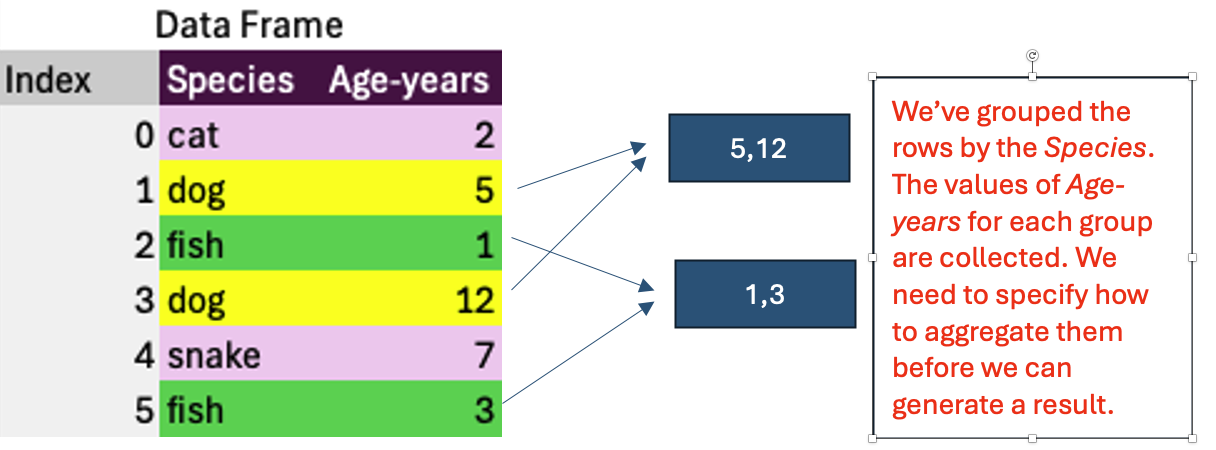!

Note: there are many ways to use groupby that can be confusing. For more examples, see also [here](https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/).

Let's look at an exmaple. We'll group by author and then aggregate

In [ ]:
dfgb_author = df.groupby('author').count()
dfgb_author.sort_values('rating', ascending=False, inplace=True)
dfgb_author.head()

This contains a lot of redundant information while also losing a lot of information as every column has been aggregated with the count method. Let's instead see how we can create a DataFrame where:
- the data is organized by author
- we have column with the mean rating of the author's books
- we have a column with the list of the authors books
- we have a column with the number of books by that author

#### Time for some data wrangling!!

First we're going to create a copy of the DataFrame. We'll then use `group_by` with the `agg` method which takes as input as _dictionary_ where each _key_ is a column name and each _value_ is a method that should be used to aggregate the column.

In [ ]:
# Let's copy the DataFrame to a new DataFrame
df_authors = df.copy()

# use the groupby method and aggregate the rating column using the mean function and the name column using the join function
df_authors = df_authors[['rating', 'name', 'author']].groupby('author').agg({'rating': "mean", 'name': '|'.join})
# finally to get a list for the name column, we can use the split method
df_authors['name'] = df_authors['name'].apply(lambda x: x.split('|'))
df_authors.head()

We're almost there. Now we just need a column that has the number of books for the author which is just the length of the corresponding list in the `name` column.

In [ ]:
# add a column to the DataFrame that contains the number of books each author has written
df_authors['num_books'] = df_authors['name'].apply(len)

# sort the DataFrame by the number of books each author has written
df_authors.sort_values('num_books', ascending=False, inplace=True)
df_authors.head()

<a class="anchor" id="seaborn"></a>
# Part 2 Implementing Various Types of Plots Using `matplotlib`  and `seaborn`.

Before you start coding your visualization, you need to decide what **type** of vizualization to use. A box plot, a histogram, a scatter plot, or something else? That will depend on the purpose of the plot (is it for performing an inspection on your data (EDA, or for showing your results/conclusions to people) and the number variables that you want to plot.

You have a lot of tools for plotting in Python. The basic one is `matplotlib` and there are other libraries that are built on top of it, such as `seaborn`, `bokeh`, or `altair`.

In this class we will continue using [`matplotlib`](https://matplotlib.org/) and also look into [`seaborn`](https://seaborn.pydata.org). Those two libraries are the ones you should be using for homework.

### Introduction to `seaborn`

`Seaborn` is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. The library provides a database of useful datasets for educational purposes that can be loaded by typing:

```python
seaborn.load_dataset(name, cache=True, data_home=None, **kws)
```

For information on what these datasets are : https://github.com/mwaskom/seaborn-data

#### The plotting functions in `seaborn` can be devided in two categories

- **'axes-level'** functions, such as `regplot`, `boxplot`, `kdeplot`, `scatterplot`, `distplot` which can connect with the `matplotlib` Axes object and its parameters. You can use that object as you would in `matplotlib`:
```python
f, (ax1, ax2) = plt.subplots(2)
sns.regplot(x, y, ax=ax1)
sns.kdeplot(x, ax=ax2)
ax1 = sns.distplot(x, kde=False, bins=20)
```

- **'figure-level'** functions, such as `lmplot`, `factorplot`, `jointplot`, `relplot`, `pairplot`. In this case, `seaborn` organizes the resulting plot which may include several Axes in a meaningful way. That means that the functions need to have total control over the figure, so it isn't possible to plot, say, an `lmplot` onto one that already exists. Calling the function always initializes a figure and sets it up for the specific plot it's drawing. These functions return an object of the type `FacetGrid` with its own methods for operating on the resulting plot.

To set the parameters for figure-level functions:

```python
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
```

### The Titanic dataset

The `titanic.csv` file contains data for 887 passengers on the Titanic. Each row represents one person. The columns describe different attributes about the person including whether they survived, their age, their on-board class, their sex, and the fare they paid.

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.info()

In [ ]:
titanic.columns

### Histograms

#### Plotting one variable's distribution (categorical and continous)
The most convenient way to take a quick look at a univariate distribution in `seaborn` is the `distplot()` function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

A histogram displays a quantitative (numerical) distribution by showing the number (or percentage) of the data values that fall in specified intervals. The intervals are on the x-axis and the number of values falling in each interval, shown as either a number or percentage, are represented by bars drawn above the corresponding intervals.

In [ ]:
# What was the age distribution among passengers in the Titanic?
import seaborn as sns
sns.set_theme(style='whitegrid')

ax = sns.displot(titanic.age, kde=False, bins=20)

ax.set(xlim=(0, 90), ylabel='counts')

In [ ]:
# What was the age distribution among passengers in the Titanic?
import seaborn as sns
sns.set_theme(style='whitegrid')

#f, ax = plt.subplots(1,1, figsize=(8, 3))
ax = sns.displot(titanic.age, kde=True, bins=20)

ax.set(xlim=(0, 90), ylabel='counts')

The __matplotlib__ way. Why use matplotlib? It's really personal preference. Seaborne offers many high level abstractions that make plotting quick. However, if you need very fine grain control (say for publications), matplotlib may be better.

In [ ]:
f, ax = plt.subplots(1,1, figsize=(8, 3))
ax.hist(titanic.age, bins=20)
ax.set_xlim(0,90)

**Pandas trick:** We want to create virtual "bins" for readability and replace ranges of values with categories.

We will do this in an ad hoc way, **it can be done better**. For example in the previous plot we could set:
    
- `(age<3) = 'infants'`,
- `(3<age<18)='children'`,
- `(18<values<90)='adults'` <BR>

See matplotlib [colors](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) here.

In [ ]:
# set the colors
cmap = plt.get_cmap('Pastel1')
young = cmap(0.5)
middle = cmap(0.2)
older = cmap(0.8)

# get the object we will change - patches is an array with len: num of bins
fig, ax = plt.subplots()
y_values, bins, patches = ax.hist(titanic.age, 10)

[patches[i].set_facecolor(young) for i in range(0,1)] # bin 0
[patches[i].set_facecolor(middle) for i in range(1,3)] # bins 1 and 2
[patches[i].set_facecolor(older) for i in range(3,10)] # 7 remaining bins

ax.grid(True)
fig.show()

#### Kernel Density Estimation
The kernel density estimate can be a useful tool for plotting the shape of a distribution. The **bandwidth (bw)** parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values.

In [ ]:
sns.kdeplot(titanic.age, bw_method=0.6, label="bw: 0.6", fill=True, color="r")
sns.kdeplot(titanic.age, bw_method=2, label="bw: 2", fill=True)

#### You can mix elements of `matplotlib` such as Axes with `seaborn` elements for a best use of both worlds.

In [ ]:
import seaborn as sns
sns.set_theme(style='whitegrid')

x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)

fig, ax = plt.subplots(1,2, figsize=(15,5))

# seaborn goes in first subplot
ax0 = sns.histplot(x1, kde=False, bins=15, ax=ax[0]) # note we don't use displot here b/c it is a figure-level function
ax1 = sns.histplot(x2, kde=False, bins=15, ax=ax[0])
ax[0].set_title('seaborn Graph Here', fontsize=14)
ax[0].set_xlabel(r'$x$', fontsize=14)
ax[0].set_ylabel(r'$count$', fontsize=14)

# matplotlib goes in second subplot
ax[1].hist(x1, alpha=0.2, bins=15, label=r'$x1$')
ax[1].hist(x2, alpha=0.5, bins=15, label=r'$x2$')
ax[1].set_xlabel(r'$x$', fontsize=14)
ax[1].set_ylabel(r'$count$', fontsize=14)
ax[1].set_title('matplotlib Graph Here', fontsize=14)
ax[1].legend(loc='best', fontsize=14)

### Boxplots

#### One variable.

In [ ]:
# seaborn
ax = sns.boxplot(x='age', data=titanic)
#ax = sns.boxplot(x=titanic['age']) # another way to write this
ax.set_ylabel(None)
ax.set_xlabel('age', fontsize=14)
ax.set_title('Distribution of age in the Titanic', fontsize=14)

In [ ]:
q50 = titanic.age.quantile(q=0.5)
q25 = titanic.age.quantile(q=0.25)
q75 = titanic.age.quantile(q=0.75)
print(f"25%:{q25} 50%:{q50} 75%:{q75}")

#### Two variables

In [ ]:
sns.boxplot(x='class', y='age', data=titanic)

### Scatterplots

#### Plotting the correlation of two variables

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="fare", y="age", data=titanic, ax=ax)


You can also show the distributions with the scatter plot. Also called a bivariate distribution where each observation is shown with a point with x and y values. You can draw a scatterplot with the `matplotlib plt.scatter` function, or the `seaborn jointplot()` function:

In [ ]:
sns.jointplot(x="fare", y="age", data=titanic, s=40, edgecolor="w", linewidth=1)

### Pairplots

In [ ]:
titanic.columns

In [ ]:
to_plot = ['age', 'fare', 'survived', 'deck']

In [ ]:
df_to_plot = titanic.loc[:,to_plot]
sns.pairplot(df_to_plot)

### Plotting Categorical Variables

In [ ]:
titanic = sns.load_dataset('titanic')
f, ax = plt.subplots(figsize=(7, 3))
ax = sns.countplot(y="deck", data=titanic, color="c")
ax.set_title('Titanic')

In [ ]:
ax = sns.countplot(x="class", data=titanic)
ax.set_title('Titanic')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) # Create figure object
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
ax = sns.countplot(x="deck", data=titanic)

In [ ]:
sns.set(style="ticks", palette="muted")
sns.relplot(x="age", y="deck", col="class", data=titanic);

# Supplemental Material
### Introduction to `pandas` plotting.

There is plotting functionality built in `pandas`. The complete documentation is [here](https://pandas.pydata.org/docs/user_guide/visualization.html).

**Example:** The `value_counts()` Series method and top-level function computes a histogram of a 1D array of values. It can
also be used as a function on regular arrays.

Reminder: DataFrame: “index” (axis=0, default), “columns” (axis=1)

### Line Graph

#### Good for time dependency or when a variable evolves

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A', 'B', 'C', 'D'])
df.head()

In [ ]:
# cumulative sum adds column values as it goes
df = df.cumsum()
df.head()

In [ ]:
plt.figure()
df.plot()
plt.legend(loc='best')

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df = df.cumsum()
plt.figure()
df.plot()

Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or ‘density’ for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots

In addition to these kind s, there are the `DataFrame.hist()`, and `DataFrame.boxplot()` methods, which use a separate interface. `scatter_matrix` in pandas.plotting takes a Series or DataFrame as an argument.

### Bar Plots

In [ ]:
plt.figure()
df.iloc[0].plot(kind='bar')

In [ ]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.head()

In [ ]:
df2.plot.bar()

In [ ]:
# horizontal bar plot
df2.plot.barh(stacked=False)

### Histograms

In [ ]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

plt.figure()
df4.plot.hist(alpha=0.5, stacked=False, bins=60)

### Boxplots

In [ ]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
        'medians': 'DarkBlue', 'caps': 'Gray'}

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box(color=color )

### Area plots

You can create area plots with `Series.plot.area()` and `DataFrame.plot.area()`. Area plots are stacked
by default. To produce stacked area plot, each column must be either all positive or all negative values.

In [ ]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area(stacked=True)

In [ ]:
df.plot.area(stacked=False)

### Scatterplot

Scatter plot can be drawn by using the DataFrame.plot.scatter() method. Scatter plot requires numeric
columns for the x and y axes. These can be specified by the x and y keywords.

In [ ]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)